# Compare leakage models

Comparing different leakage models for illustration:

* 9-component fitted model
* Hamming weight
* reduced templates

These models are obtained in parts 3 and 4.

The predicted leakge for each of the values of the intermediate variable is
plotted, and Pearson corelation coefficient between the prediction vectors
is computed as a measure of similarity.

Note that both fitted HW and pure HW yield the same correlation coefficient
of 0.857798 from comparison to the to 9-component LR-fitted model. This
ilustrates the property of Pearson correlation coefficient to be invariant
under an affine linear transformation.

Part of the leakage modeling tutorial, license is GPLv3, see https://www.gnu.org/licenses/gpl-3.0.en.html<br>
Requires traces and data from [pysca toolbox](https://github.com/ikizhvatov/pysca)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Functions for computing leakage models

In [2]:
# 8-component leakage function; beta is a 9-element array
def leakage9(x, beta):
    result = beta[8]
    for i in range(0, 8):
        bit = (x >> i) & 1  # this is the definition: gi = [bit i of x]
        result += beta[i] * bit
    return result

# Hamming weight leakage model
def leakageHWpure(x, beta):
    return byteHammingWeight[x]

# Hamming weight leakage model with coefficient and intercept obtained by linear regression
# beta is a 2-element array
def leakageHWfitted(x, beta):
    return beta[0] * byteHammingWeight[x] + beta[1]

Load the previously built leakage models

In [4]:
byteHammingWeight = np.load('../data/bytehammingweight.npy') # HW model
beta9 = np.load('results/lrmodel9_1000traces.npy')           # LR model with 9 coefs
betaHW = np.load('results/lrmodelhw.npy')                    # LR model with coefs
predictionsT = np.load('results/means2000.npy')              # Templates (reduced)

Predict the leakge for two models of your choice

In [5]:
predictions9 = np.zeros(256)
predictionsHW = np.zeros(256)

for x in range(256):
    predictions9[x] = leakage9(x, beta9)
    predictionsHW[x] = leakageHWfitted(x, betaHW) # replace by leakageHWpure to see no difference

Correlate the models to compare how close they are

In [12]:
c1 = np.corrcoef(predictionsHW, predictions9)
c2 = np.corrcoef(predictionsHW, predictionsT)
c3 = np.corrcoef(predictions9, predictionsT)
print("Correlation HW to LR9: %.02f" % c1[0,1])
print("Correlation HW to T  : %.02f" % c2[0,1])
print("Correlation LR9 to T : %.02f" % c3[0,1])

Correlation HW to LR9: 0.86
Correlation HW to T  : 0.73
Correlation LR9 to T : 0.86


Plot the two leakage vectors, visualizing the difference.

HW vs 9-component LR. Note how HW dots fall in 9 lines, and how LR model is different from the HW model. Later we will see what effect this has in the correlation power analysis attack.

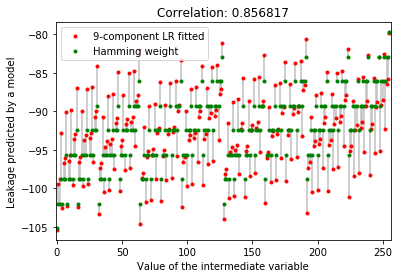

In [16]:
for x in range(256):
    line = np.array([predictions9[x], predictionsHW[x]])
    plt.plot(np.array([x, x]), line, '-', color='silver')
p1, = plt.plot(predictions9, 'r.')  # left-hand size is for later use in the legend
p2, = plt.plot(predictionsHW, 'g.')

plt.xlim(-1, 256)
plt.xlabel('Value of the intermediate variable')
plt.ylabel('Leakage predicted by a model')
plt.title('Correlation: %f' % c1[0,1])
plt.legend([p1, p2], ['9-component LR fitted', 'Hamming weight'], loc='best', numpoints=1)
plt.show()

And now 9-component LR vs templates. Note how templates, which are the most precise way to model the leakage (when enough traces are availabled, which holds in our case), are firther different from the LR model.

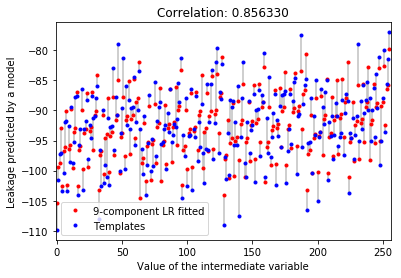

In [21]:
for x in range(256):
    line = np.array([predictions9[x], predictionsT[x]])
    plt.plot(np.array([x, x]), line, '-', color='silver')
p1, = plt.plot(predictions9, 'r.')  # left-hand size is for later use in the legend
p3, = plt.plot(predictionsT, 'b.')

plt.xlim(-1, 256)
plt.xlabel('Value of the intermediate variable')
plt.ylabel('Leakage predicted by a model')
plt.title('Correlation: %f' % c3[0,1])
plt.legend([p1, p3], ['9-component LR fitted', 'Templates'], loc='best', numpoints=1)
plt.show()